In [1]:
import sys
# !{sys.executable} -m pip install pennylane==0.31.0
import pennylane as qml
import numpy as np
from quantum.circuits.Ansatz import rotation_layer, EfficientSU2, TwoLocal, ModifiedPauliTwo, HadamardAnsatz, ExcitationPreserving


In [2]:
from qiskit.circuit import library

In [3]:
wires = [0,1,2,3]
dev = qml.device('default.qubit', wires=wires)

(<Figure size 500x500 with 1 Axes>, <Axes: >)

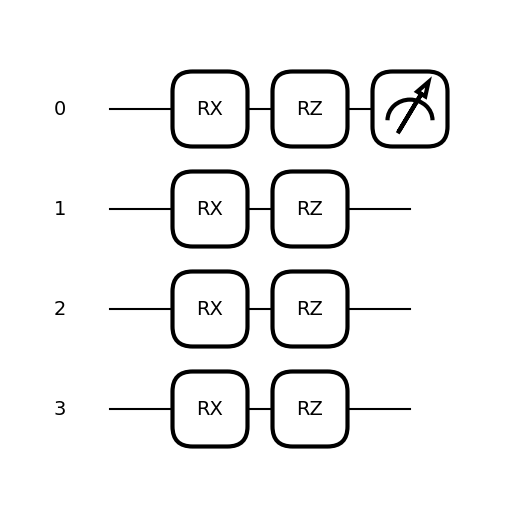

In [6]:
@qml.qnode(dev)
def circuit(params,wires):
    rotation_layer(params, wires, False)
    return qml.expval(qml.PauliZ(0))
draw = qml.draw_mpl(circuit)
draw(np.random.rand(8).tolist(),wires)

In [7]:
@qml.qnode(dev)
def circuit(params,wires):
    EfficientSU2(params, wires, skip_final_rot=True)
    return qml.expval(qml.PauliZ(0))
draw = qml.draw_mpl(circuit)
draw(np.random.rand(11).tolist(),wires)

TypeError: Invalid input type <class 'int'>. `layer` must be a type, str or QuantumCircuit.

(<Figure size 400x100 with 1 Axes>, <Axes: >)

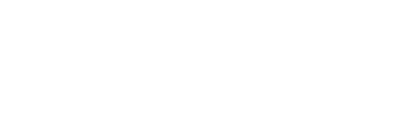

In [12]:
qml.draw_mpl(TwoLocal)(np.random.rand(11), wires, rot_gates=['rx', 'rz'], entangle_gates='crz', skip_final_rot=True)

(<Figure size 400x200 with 1 Axes>, <Axes: >)

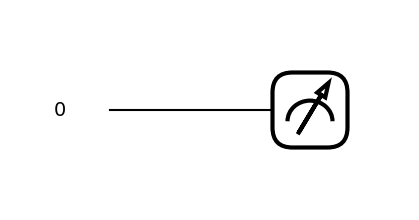

In [8]:
@qml.qnode(dev)
def circuit(params,wires):
    TwoLocal(params, wires, rot_gates=['rx', 'rz'], entangle_gates='crz', skip_final_rot=True)
    return qml.expval(qml.PauliZ(0))
draw = qml.draw_mpl(circuit)
draw(np.random.rand(11).tolist(),wires)

In [ ]:
entanglement= [(0,1), (0,2), (0,3), (1,0), (1,2), (1,3), (2,0), (2,1), (2,3), (3,0), (3,1), (3,2)]
@qml.qnode(dev)
def circuit(params,wires):
    TwoLocal(params, wires, rot_gates=['rx', 'rz'], entangle_gates='crz', entanglement=entanglement, skip_final_rot=False)
    return qml.expval(qml.PauliZ(0))
draw = qml.draw_mpl(circuit)
draw(np.random.rand(28))

In [ ]:
@qml.qnode(dev)
def circuit(params,wires):
    ModifiedPauliTwo(params, wires, rotation_block=['rx', 'rz'])
    return qml.expval(qml.PauliZ(0))
draw = qml.draw_mpl(circuit)
draw(np.random.rand(19))

In [ ]:
@qml.qnode(dev)
def circuit(params,wires):
    ModifiedPauliTwo(params, wires, entanglement='cnot', full_rotation=False)
    return qml.expval(qml.PauliZ(0))
draw = qml.draw_mpl(circuit)
draw(np.random.rand(12))

In [ ]:
@qml.qnode(dev)
def circuit(params,wires):
    HadamardAnsatz(params, wires)
    return qml.expval(qml.PauliZ(0))
draw = qml.draw_mpl(circuit)
draw(np.random.rand(4))

In [ ]:
@qml.qnode(dev)
def circuit(params,wires):
    ExcitationPreserving(params, wires)
    return qml.expval(qml.PauliZ(0))
draw = qml.draw_mpl(circuit)
draw(np.random.rand(11))